In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Remember the 4 steps:
1. Data
2. Model
3. Objective function
4. Optimisation algorithm

## Data generation

In [41]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(low=-1, high=1, size=(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [52]:
training_data = np.load('TF_intro.npz')

input_size = 2 # inputs x & z
output_size = 1 # only 1 output y

# TF2 is based on Keras
# Sequential function specifies how the model will be laid down ('stacks layers')
# Takes inputs, applies linear transformation, gives outputs
# Linear combination + Output = "layer"
model = tf.keras.Sequential([
    # Dense calculates dot product of inputs + weights then adds bias
    tf.keras.layers.Dense(
        output_size,
        
        # Kernel initialiser sets initial weights
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
    
        # Bias initialiser sets initial bias
        bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
    )
])

custom_optimiser = tf.keras.optimizers.SGD(learning_rate=0.02)

# compile() configures the model for training
model.compile(optimizer=custom_optimiser, # Optimisation algorithm, we use Stochastic Gradient Descent
             loss='mean_squared_error') # Objective function, this is the same as the previous example! L2 norm loss = Mean Squared Error

# fit() then trains the model, epoch = an iteration over the whole dataset
# Verbose = 0 makes it "silent", so it doesn't print progress bars
# Verbose = 1 prints everything, Verbose = 2 only prints 1 line per epoch
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 20.1958
Epoch 2/100
1000/1000 - 0s - loss: 1.1256
Epoch 3/100
1000/1000 - 0s - loss: 0.4640
Epoch 4/100
1000/1000 - 0s - loss: 0.3968
Epoch 5/100
1000/1000 - 0s - loss: 0.4077
Epoch 6/100
1000/1000 - 0s - loss: 0.3615
Epoch 7/100
1000/1000 - 0s - loss: 0.3723
Epoch 8/100
1000/1000 - 0s - loss: 0.3578
Epoch 9/100
1000/1000 - 0s - loss: 0.3567
Epoch 10/100
1000/1000 - 0s - loss: 0.4048
Epoch 11/100
1000/1000 - 0s - loss: 0.3601
Epoch 12/100
1000/1000 - 0s - loss: 0.3649
Epoch 13/100
1000/1000 - 0s - loss: 0.3598
Epoch 14/100
1000/1000 - 0s - loss: 0.3821
Epoch 15/100
1000/1000 - 0s - loss: 0.3725
Epoch 16/100
1000/1000 - 0s - loss: 0.3733
Epoch 17/100
1000/1000 - 0s - loss: 0.3764
Epoch 18/100
1000/1000 - 0s - loss: 0.3473
Epoch 19/100
1000/1000 - 0s - loss: 0.3650
Epoch 20/100
1000/1000 - 0s - loss: 0.3845
Epoch 21/100
1000/1000 - 0s - loss: 0.3484
Epoch 22/100
1000/1000 - 0s - loss: 0.3706
Epoch 23/100
1000/1000 - 0s - loss: 0.43

## Extract weights & bias

In [33]:
# Only one layer, so index at zero
model.layers[0].get_weights()

[array([[ 2.0630298],
        [-3.035197 ]], dtype=float32),
 array([5.0121326], dtype=float32)]

## Extract outputs

In [34]:
# predict_on_batch() calculates outputs given inputs
predicted_vals = np.array(model.predict_on_batch(training_data['inputs'])).round(1)
predicted_vals[:5]

array([[  0.3],
       [ -7.5],
       [-18.4],
       [  5.3],
       [ 23.7]], dtype=float32)

In [35]:
# Manually compare to targets!
target_vals = training_data['targets'].round(1)
target_vals[:5]

array([[  1.3],
       [ -7.1],
       [-18.3],
       [  5.2],
       [ 23.8]])

## Plot data

We want a 45 degree angle!

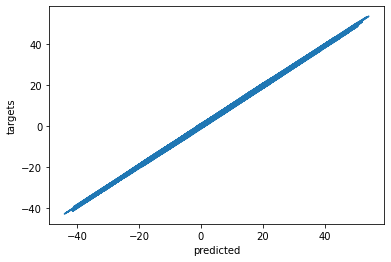

In [37]:
# np.squeeze removes array axes with a value of 1
# eg. array of shape (1,3,1) becomes an array of shape (3,)
plt.plot(np.squeeze(predicted_vals), np.squeeze(target_vals))
plt.xlabel('predicted')
plt.ylabel('targets')
plt.show()